In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load iris dataset from CSV
df = pd.read_csv("iris.csv")  # Make sure iris.csv is in the working directory
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check column names
print(df.columns)

# If column names are like 'SepalLengthCm', 'SepalWidthCm', etc., continue
# Define features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Last column: 'Species'


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Create and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


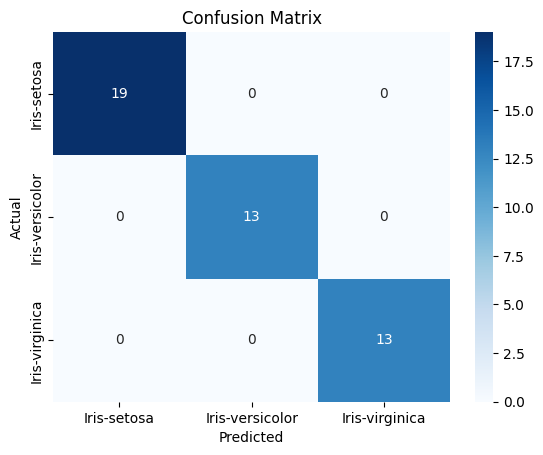

In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# If it's a multiclass problem, we won't directly get TP, TN, FP, FN for each class in one number
# But you can visualize the matrix and get per-class metrics
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
# Classification report: Precision, Recall, F1, Accuracy
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=model.classes_))


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [9]:
# Example: Convert to binary - setosa vs not-setosa
y_test_binary = y_test == 'Iris-setosa'
y_pred_binary = y_pred == 'Iris-setosa'

from sklearn.metrics import confusion_matrix

# Now binary, so this will work
TN, FP, FN, TP = confusion_matrix(y_test_binary, y_pred_binary).ravel()
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")


TP: 19, FP: 0, TN: 26, FN: 0
